In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ=pd.read_csv('fuel-econ.csv')

fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


>Example 1. Default heat plot using Matplotlib.pyplot.hist2d() function


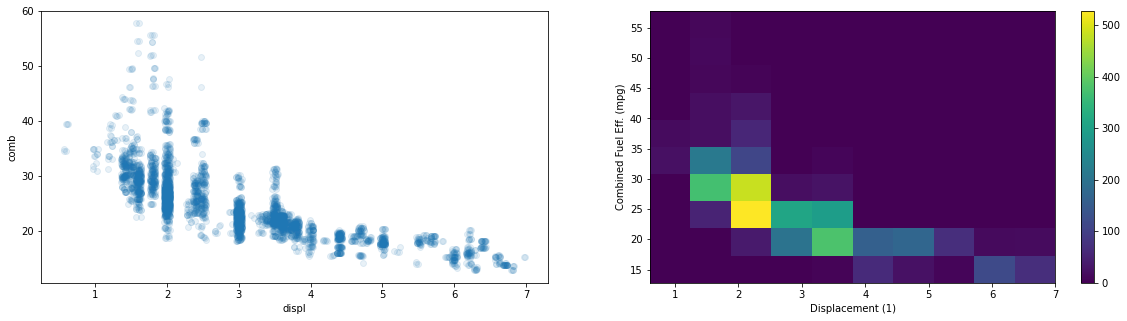

In [6]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sb.regplot(data=fuel_econ, x='displ', y='comb', 
           x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)

plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

>Example 2. Heat plot - Set a minimum bound on counts and a reverse color map


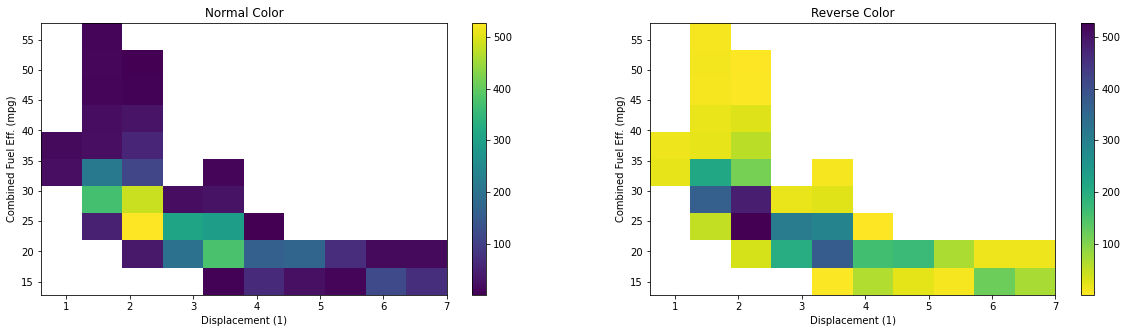

In [10]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.hist2d(data=fuel_econ, x='displ', y='comb',
         cmin=0.5)
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("Normal Color");

plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb',
           cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("Reverse Color");


>Example 3. Heat plot - Specify bin edges


In [18]:
fuel_econ[['displ', 'comb']].describe()

bin_x=np.arange(.6,7+0.3,0.3)
bin_y=np.arange(12,58+3,3)

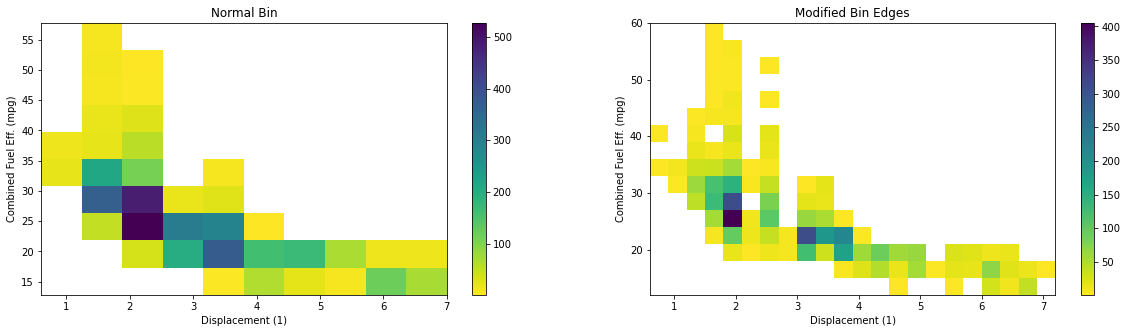

In [34]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.hist2d(data=fuel_econ, x='displ', y='comb',
         cmin=0.5, cmap='viridis_r' )
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("Normal Bin");

plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb',
          cmin=0.5, cmap='viridis_r', bins=[bin_x, bin_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("Modified Bin Edges");

> Example 4. Add text annotation on each cell using pyplot.text() function


(22, 16)


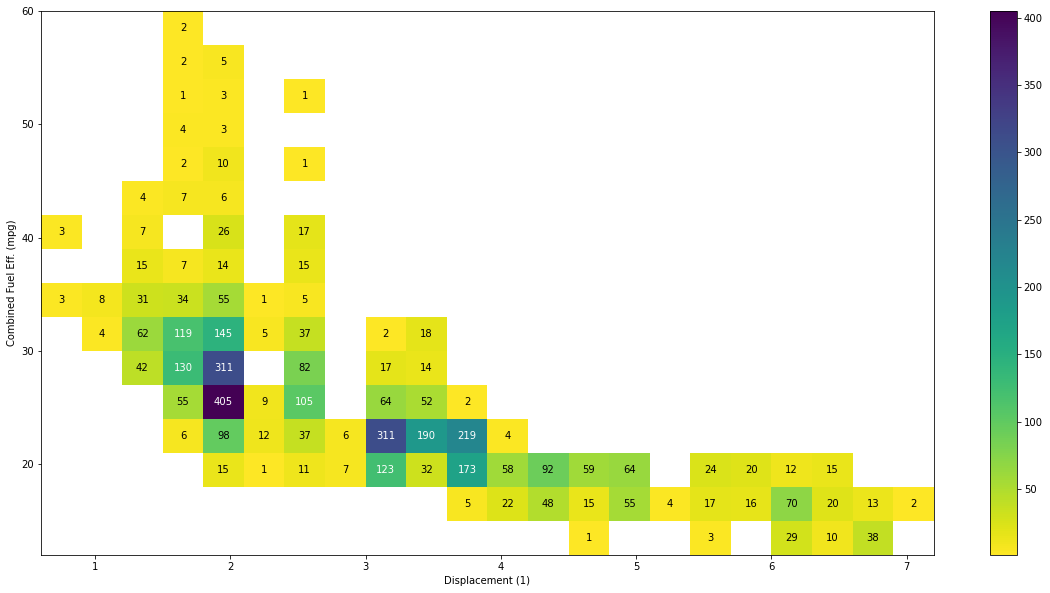

In [37]:
plt.figure(figsize=[20,10])

# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

print(counts.shape)
# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.15, bins_y[j]+1.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.15, bins_y[j]+1.5, int(c),
                     ha = 'center', va = 'center', color = 'black')